In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

data = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"])


<ipython-input-8-30cfce677611>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"])


In [9]:
data.shape

(32561, 15)

In [10]:
# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [11]:
data_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
data_encoded.shape

(30162, 97)

In [3]:

# Separate features and target
X = data_encoded.drop('income_>50K', axis=1)
y = data_encoded['income_>50K']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[3.54333987 2.72887093 2.58895883]

Eigenvectors:
[[ 2.54824644e-01 -6.45680717e-02  3.06464460e-01  1.10985837e-01
   8.56084516e-02  2.19248649e-01  9.29945480e-02 -2.44043735e-01
   1.36793041e-01  1.41195928e-01  6.37645815e-02  1.52160034e-04
  -1.06432226e-01 -5.88448816e-02 -5.79322974e-02 -7.51934860e-02
  -3.64306829e-02 -5.95260244e-02  1.99124145e-02  2.30680486e-02
   1.54887001e-01  1.03769874e-01 -8.80559235e-02  1.49339084e-01
  -3.82305623e-02  1.25023714e-01 -6.54876799e-02  9.34301688e-05
   3.44389124e-01 -4.28086353e-02 -3.05759893e-01 -6.42157391e-02
  -2.76781249e-02 -1.34035711e-03  1.45821162e-02  1.50058546e-01
   2.55905765e-02 -1.01402591e-01 -7.77223360e-02 -1.88520918e-01
  -6.01295467e-02  1.89479262e-01  3.49090166e-02 -1.21155556e-02
  -5.75270907e-04  2.61681035e-03 -8.99921420e-02 -9.84959635e-02
  -2.45688497e-01 -9.68946685e-02  6.02019877e-02 -2.35118684e-02
  -1.45995815e-01 -5.58587434e-02  1.52775169e-01  1.85550667e-01
   5.77094524

In [7]:
X_pca.shape

(30162, 3)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# SVM on original data
svm_original = SVC(kernel='linear')
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)

# SVM on PCA transformed data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

# Compare results
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy on original data: {:.2f}%".format(accuracy_original * 100))
print("Accuracy on PCA transformed data: {:.2f}%".format(accuracy_pca * 100))


Accuracy on original data: 85.26%
Accuracy on PCA transformed data: 81.27%


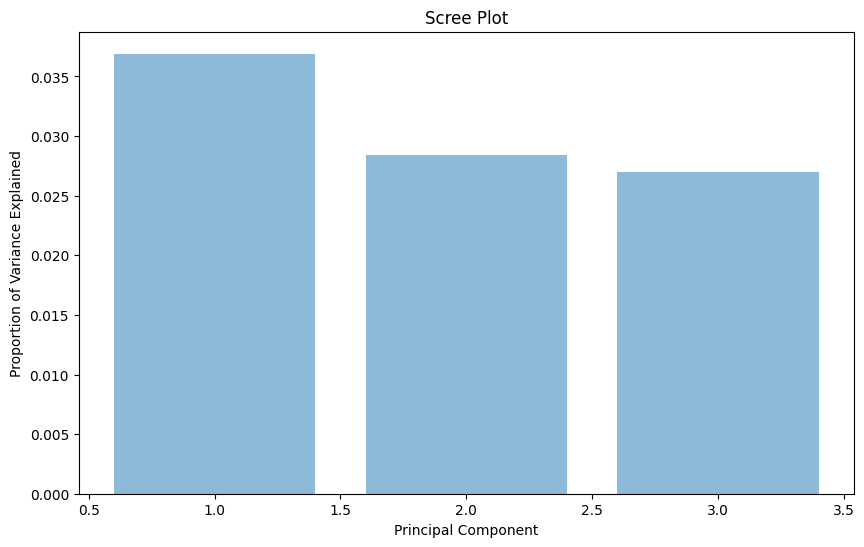

In [5]:
import matplotlib.pyplot as plt

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()
